# Exploratory Data Analysis

This notebook shows how to do a fast exploratory analysis on the available data.

## Data acquisition

#### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Load data into pandas, NumPy or another similar tool and summarize the data

In [2]:
# Create a dataframe reading all csv files
file_path="../../zurich-air-quality-data/"
data_list={}
df=pd.DataFrame()
for year in range(1983,2026):
    file_name='ugz_ogd_air_d1_'+str(year)+'.csv'
    df_year = pd.read_csv(file_path+file_name)
    df = pd.concat([df, df_year],ignore_index=True)

df.head

<bound method NDFrame.head of                         Datum                 Standort     Parameter  \
0       1983-01-01T00:00+0100  Zch_Stampfenbachstrasse            CO   
1       1983-01-01T00:00+0100  Zch_Stampfenbachstrasse           NO2   
2       1983-01-01T00:00+0100  Zch_Stampfenbachstrasse            NO   
3       1983-01-01T00:00+0100  Zch_Stampfenbachstrasse           NOx   
4       1983-01-01T00:00+0100  Zch_Stampfenbachstrasse           SO2   
...                       ...                      ...           ...   
309122  2025-02-17T00:00+0100         Zch_Heubeeribüel            NO   
309123  2025-02-17T00:00+0100         Zch_Heubeeribüel           NO2   
309124  2025-02-17T00:00+0100         Zch_Heubeeribüel            O3   
309125  2025-02-17T00:00+0100         Zch_Heubeeribüel     O3_max_h1   
309126  2025-02-17T00:00+0100         Zch_Heubeeribüel  O3_nb_h1>120   

       Intervall Einheit    Wert        Status  
0             d1   mg/m3    4.10     bereinigt  
1      

In [3]:
# Create the list of locations and parameters
locations=df["Standort"].unique()
parameters=df["Parameter"].unique()
locations
parameters

array(['CO', 'NO2', 'NO', 'NOx', 'SO2', 'O3', 'O3_max_h1', 'O3_nb_h1>120',
       'PM10', 'PN', 'PM2.5'], dtype=object)

##### Transform the data to the right format

In [4]:
df[["Wert"]] = df[["Wert"]].apply(pd.to_numeric,errors='coerce')
df[["Datum"]] = df[["Datum"]].apply(pd.to_datetime,errors='coerce')

df.head()


,Datum,Standort,Parameter,Intervall,Einheit,Wert,Status
0,1983-01-01 00:00:00+01:00,Zch_Stampfenbachstrasse,CO,d1,mg/m3,4.10,bereinigt
1,1983-01-01 00:00:00+01:00,Zch_Stampfenbachstrasse,NO2,d1,µg/m3,68.80,bereinigt
2,1983-01-01 00:00:00+01:00,Zch_Stampfenbachstrasse,NO,d1,µg/m3,214.73,bereinigt
3,1983-01-01 00:00:00+01:00,Zch_Stampfenbachstrasse,NOx,d1,ppb,208.14,bereinigt
4,1983-01-01 00:00:00+01:00,Zch_Stampfenbachstrasse,SO2,d1,µg/m3,133.26,bereinigt


## Data exploration

#### General summary for all the keys in the challenged data

In [5]:
for key in df.keys():
    print(df[key].describe(include='all'))


count                                 309127
mean     2009-03-04 02:13:37.085534464+01:00
min                1983-01-01 00:00:00+01:00
25%                2000-01-10 00:00:00+01:00
50%                2011-07-20 00:00:00+01:00
75%                2018-11-27 12:00:00+01:00
max                2025-02-17 00:00:00+01:00
Name: Datum, dtype: object
count                      309127
unique                          4
top       Zch_Stampfenbachstrasse
freq                       133821
Name: Standort, dtype: object
count     309127
unique        11
top           O3
freq       41230
Name: Parameter, dtype: object
count     309127
unique         1
top           d1
freq      309127
Name: Intervall, dtype: object
count     309127
unique         5
top        µg/m3
freq      204675
Name: Einheit, dtype: object
count    301290.000000
mean        398.330652
std        2414.351440
min         -10.400000
25%           4.470000
50%          23.120000
75%          56.320000
max       78863.570000
Name: Wert, d

#### Create a dictionary with all locations and contaminants

In [6]:
air_parameter_location={}
for location in locations:
    air_parameter_location[location]={}
    for parameter in parameters:
        air_parameter_location[location][parameter]=df.loc[df.Standort.isin([location]) & df.Parameter.isin([parameter]),["Datum","Wert","Einheit"]].reset_index()


#### Plot time series for each location and parameter

/tmp/ipykernel_220/3413040106.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig1, ax1 = plt.subplots()


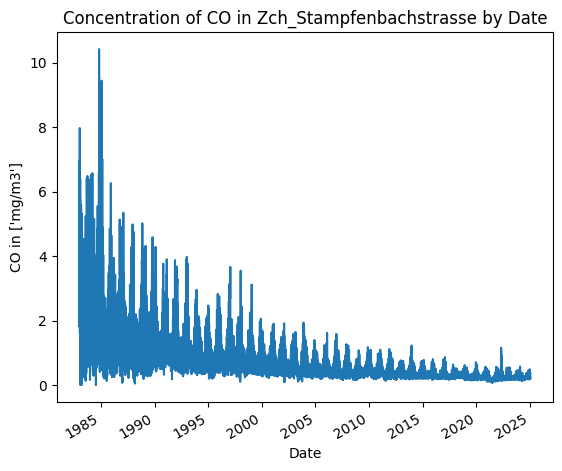

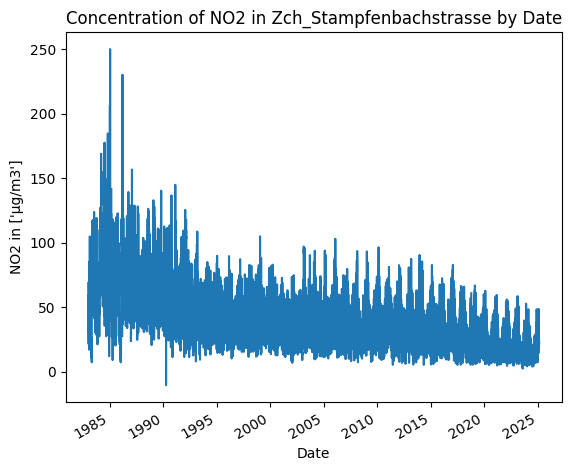

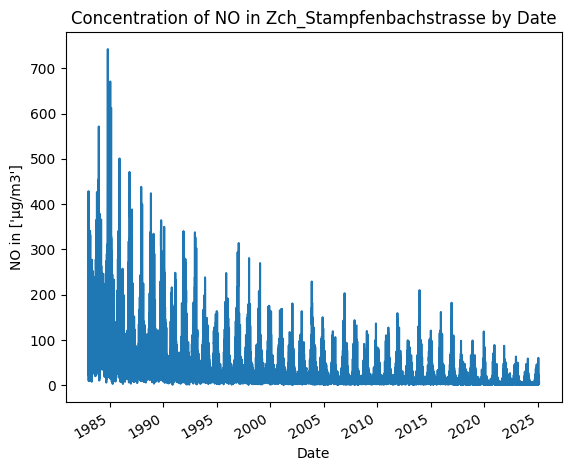

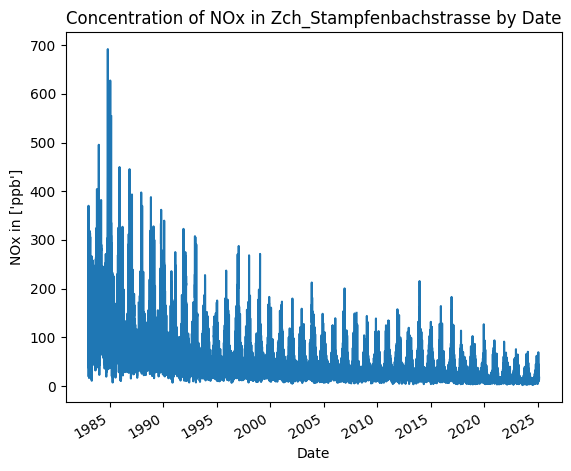

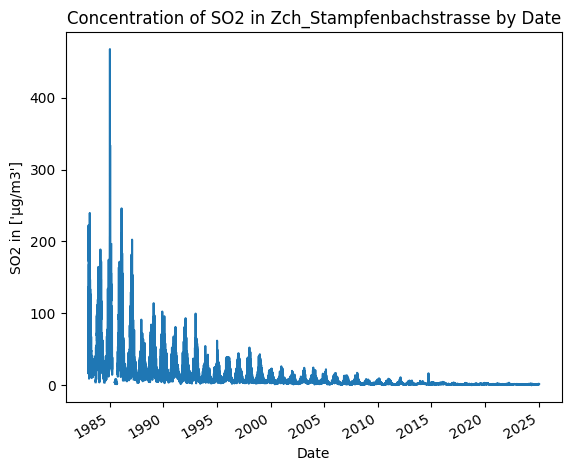

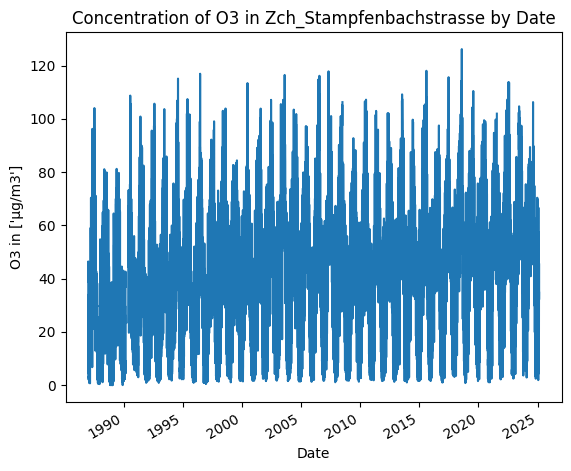

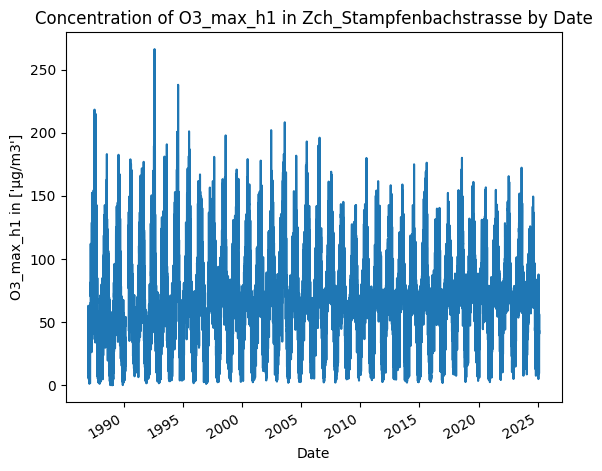

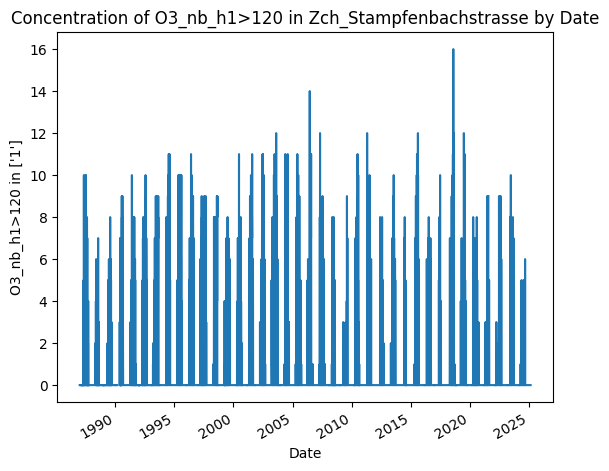

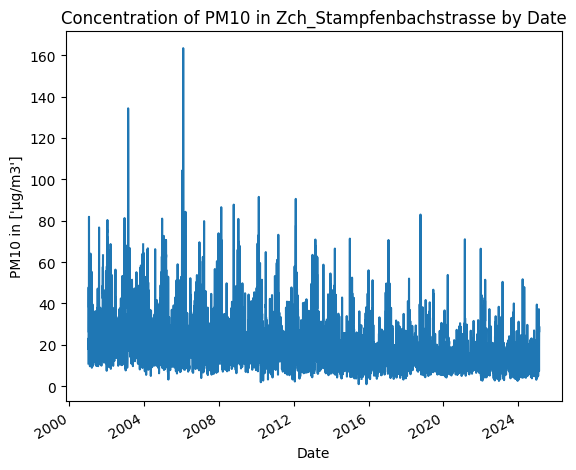

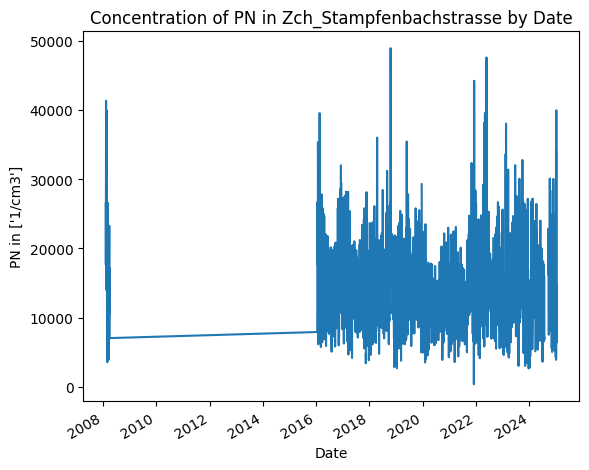

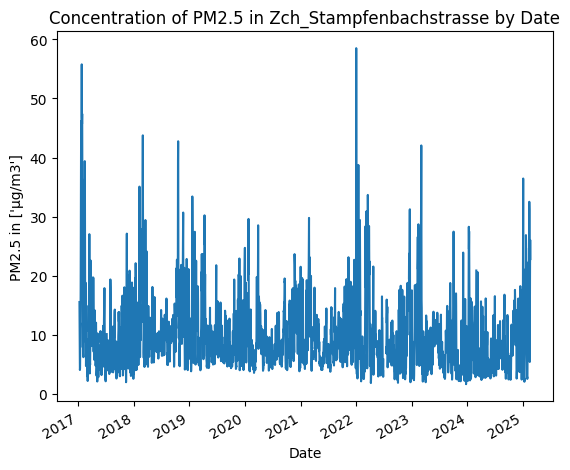

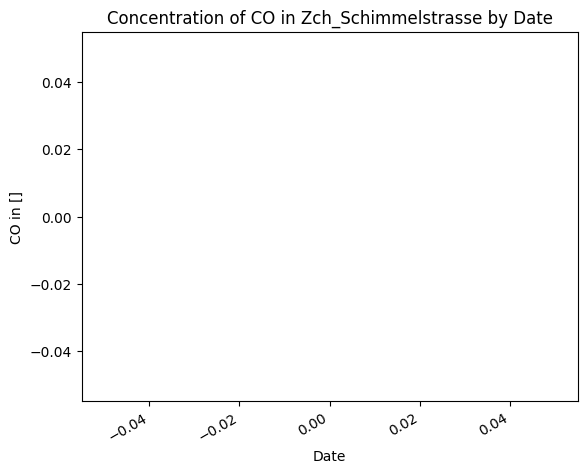

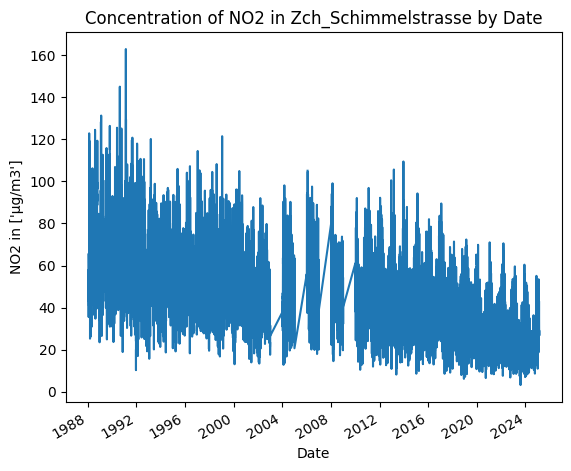

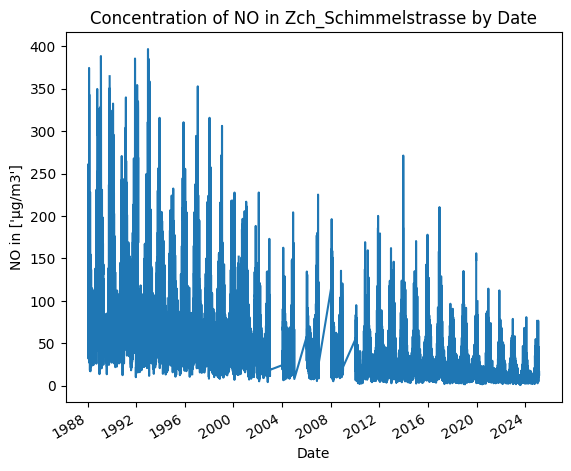

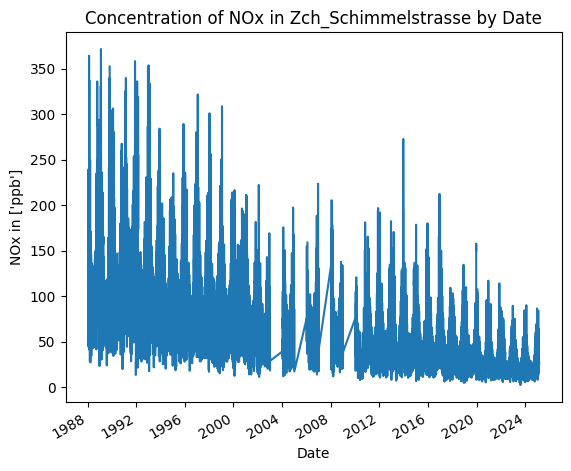

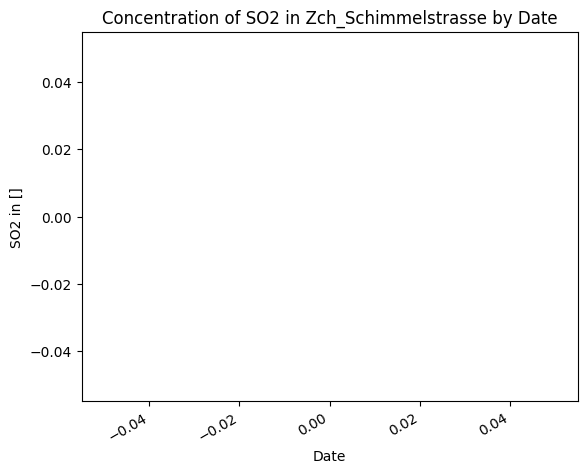

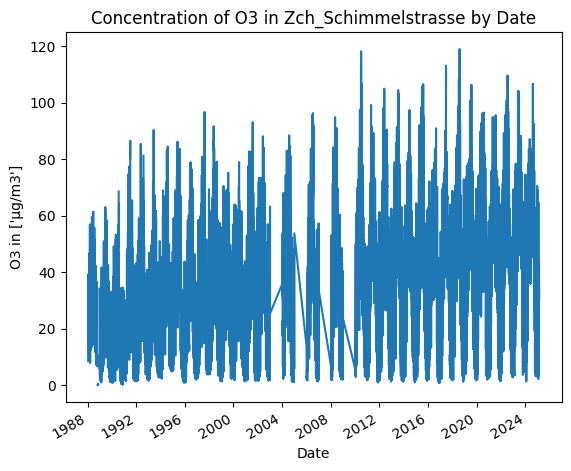

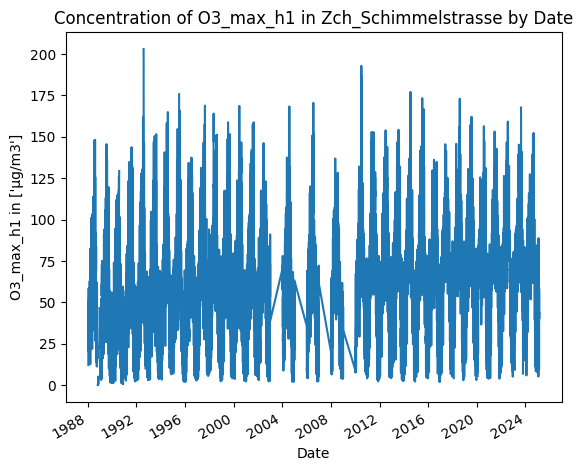

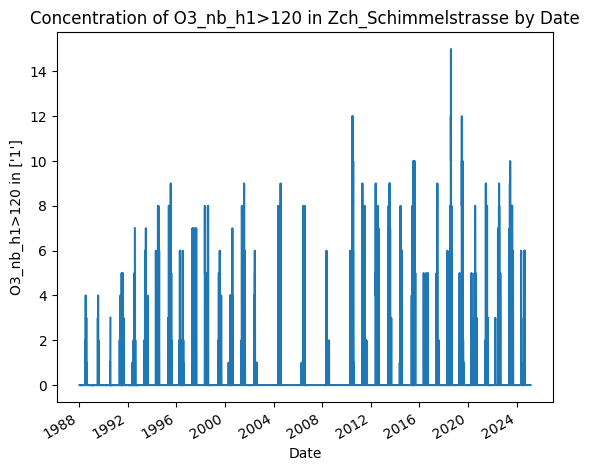

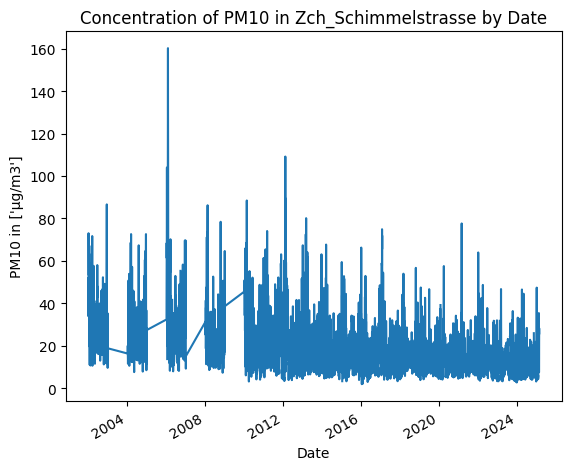

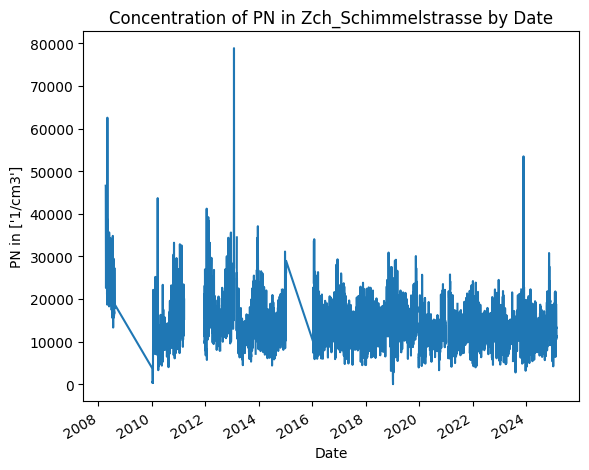

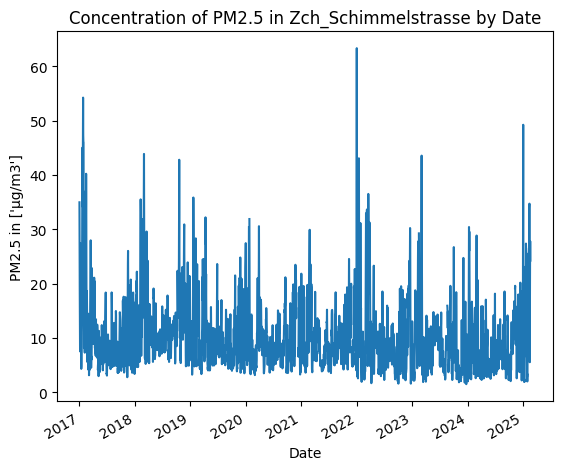

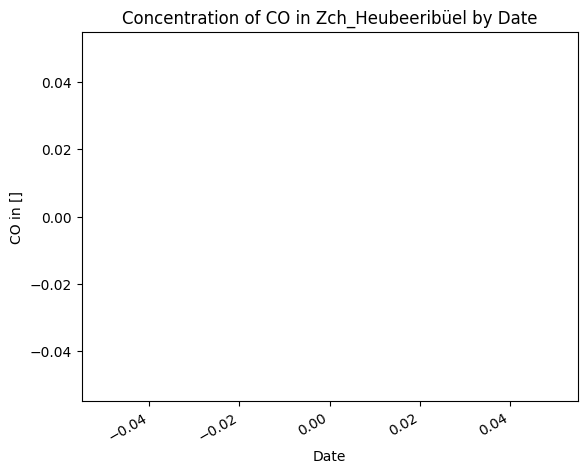

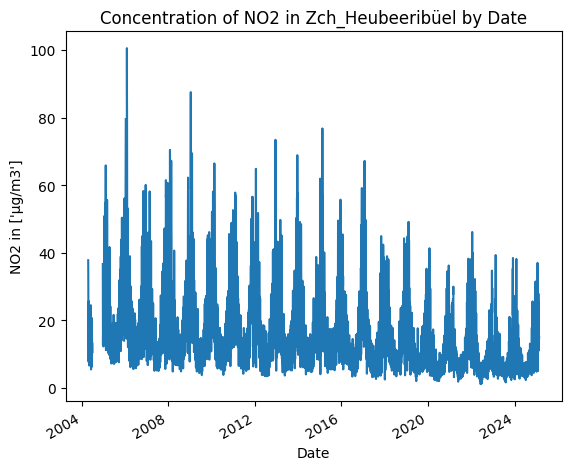

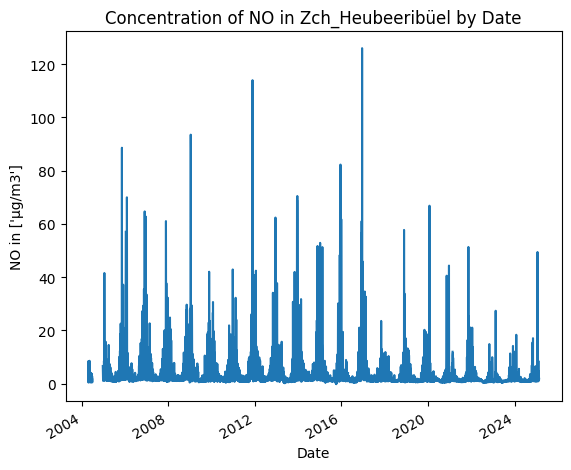

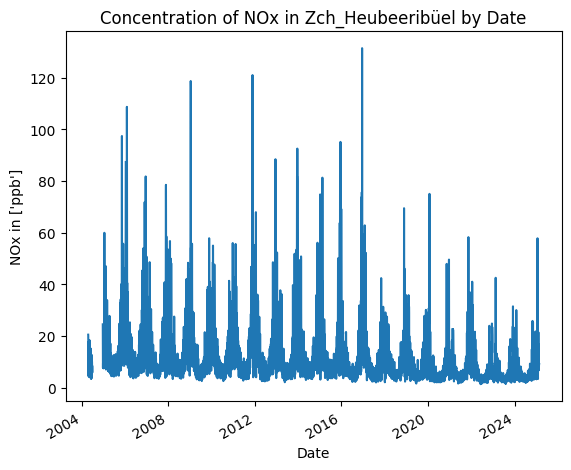

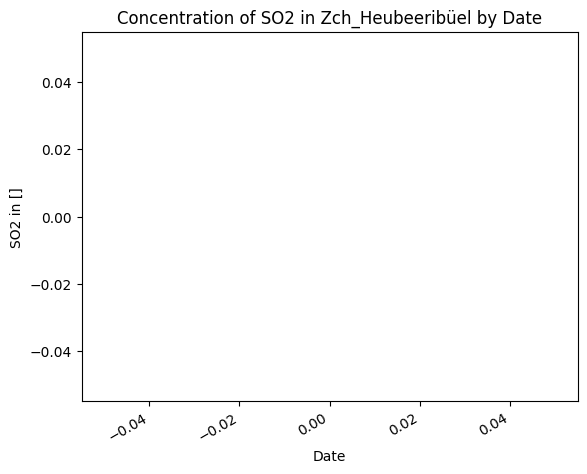

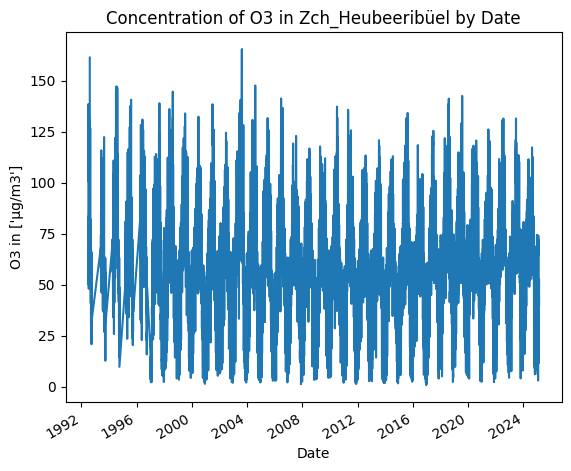

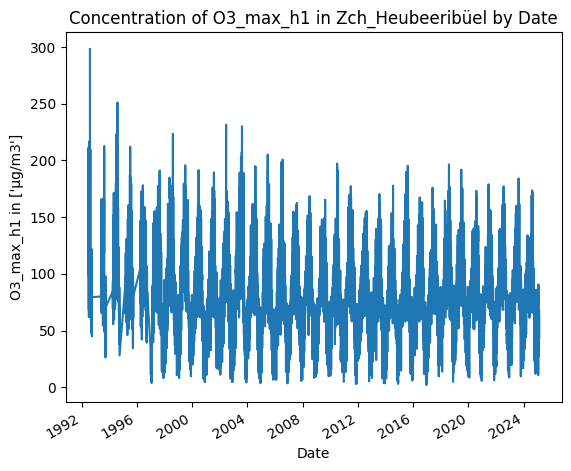

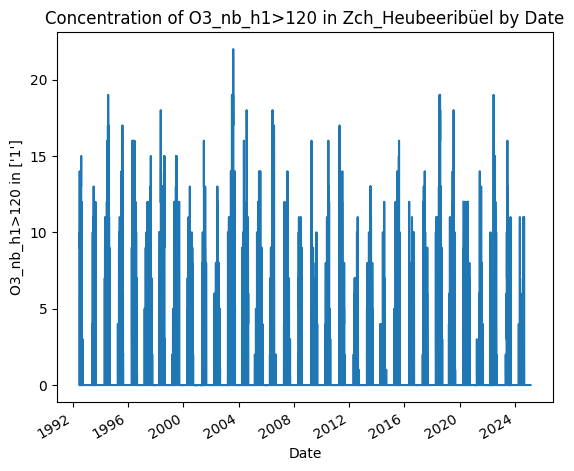

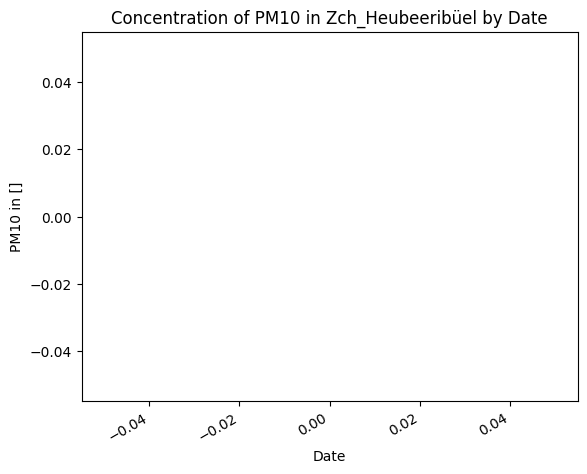

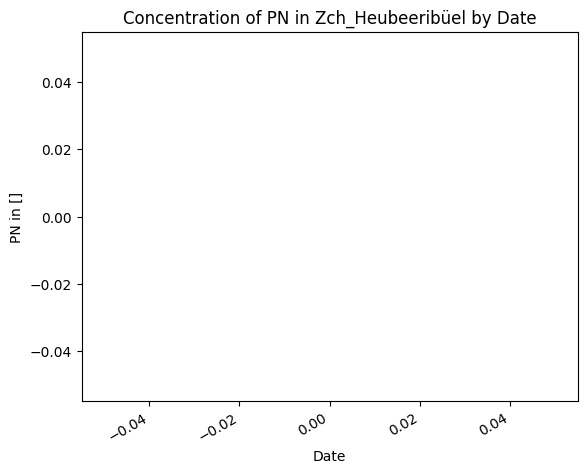

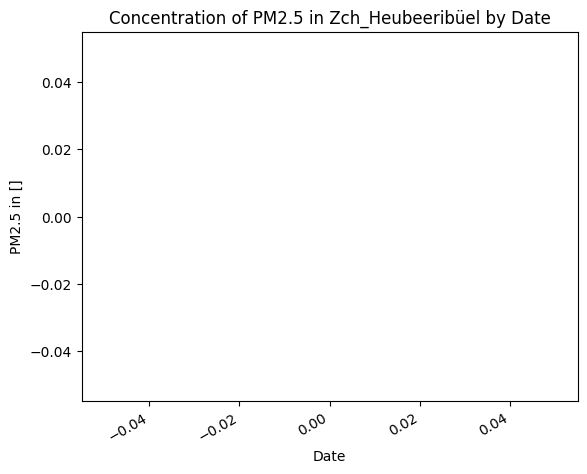

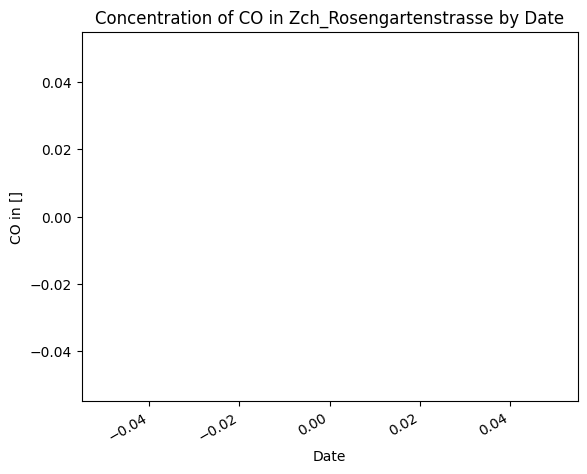

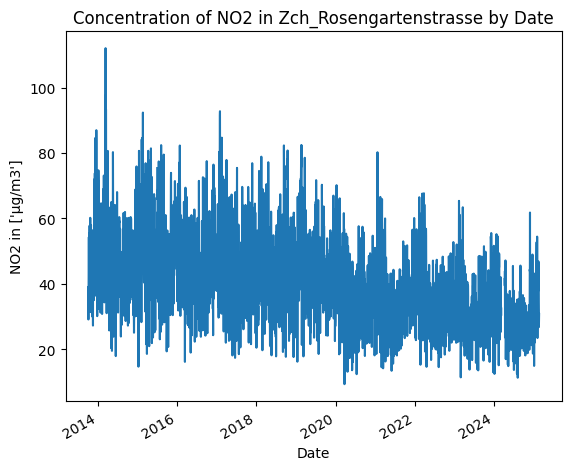

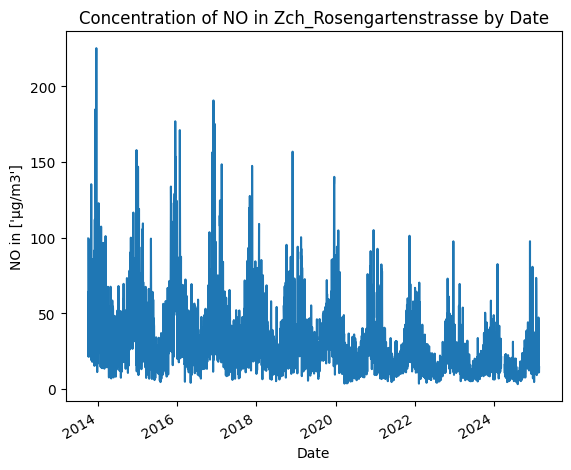

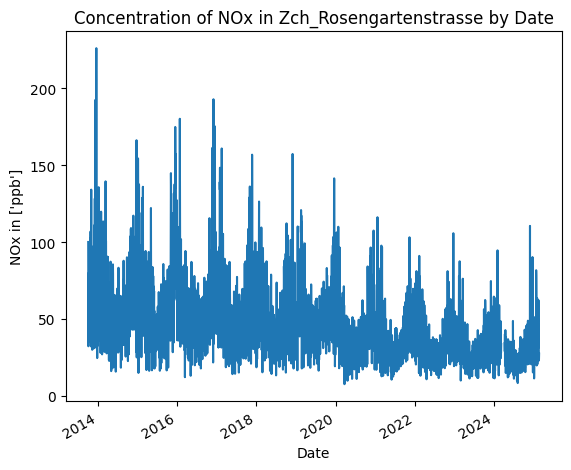

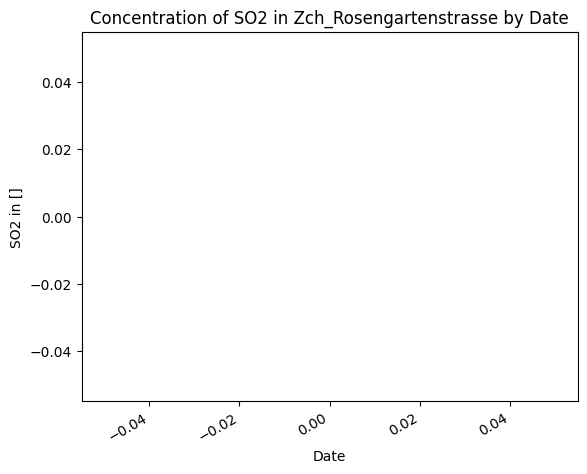

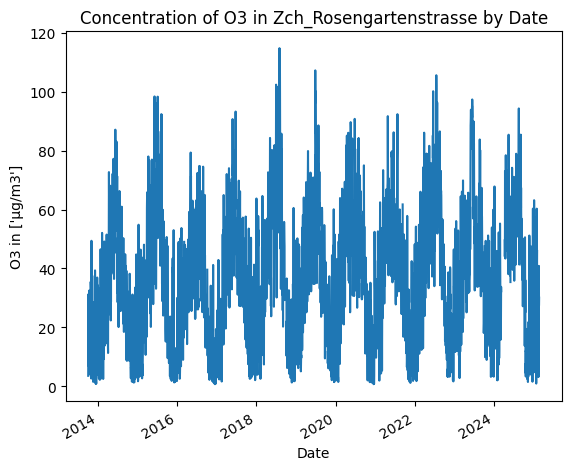

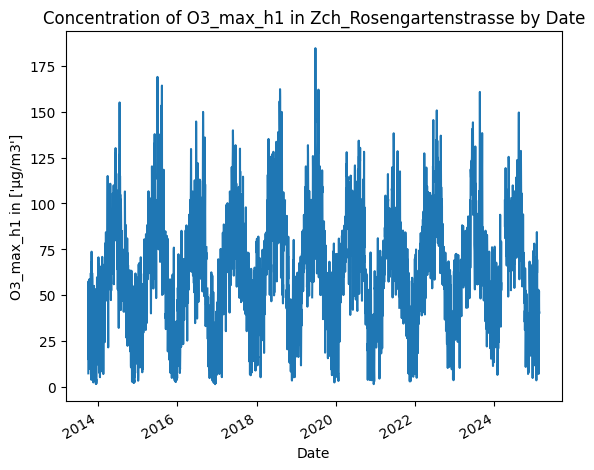

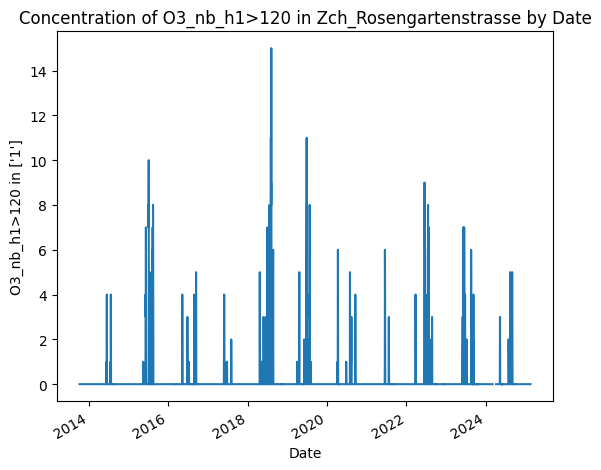

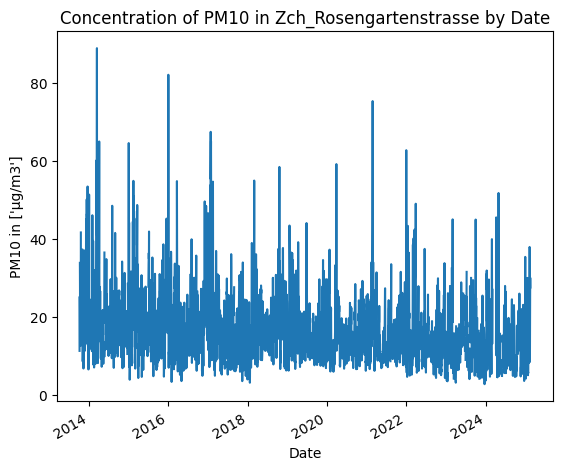

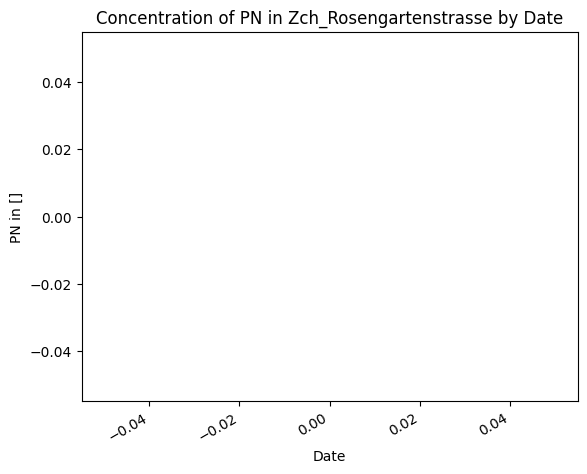

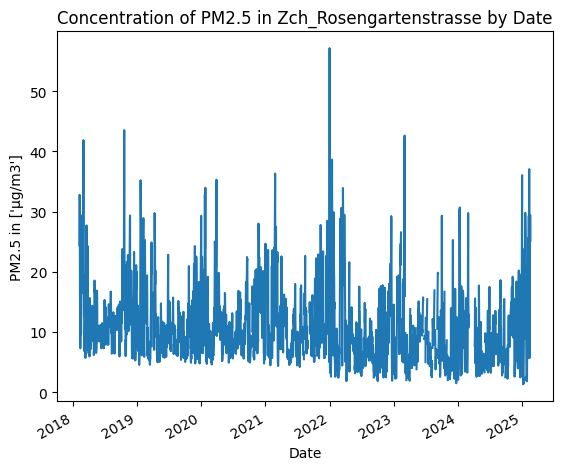

In [7]:
for location in locations:
    for parameter in parameters:
        # Plotting the time series of given dataframe
        fig1, ax1 = plt.subplots()
        plt.plot(air_parameter_location[location][parameter].Datum, air_parameter_location[location][parameter].Wert)
        
        # Giving title to the chart using plt.title
        plt.title('Concentration of ' + str(parameter) + ' in ' + str(location) +' by Date')
        
        # rotating the x-axis tick labels at 30degree 
        # towards right
        plt.xticks(rotation=30, ha='right')
        
        # Providing x and y label to the chart
        plt.xlabel('Date')
        units=air_parameter_location[location][parameter].Einheit.unique()
        plt.ylabel(str(parameter)+' in '+str((units)))
        